In [1]:
import os
import pandas as pd
import urllib
from matplotlib import pyplot as plt
import cv2
import numpy as np 
from PIL import Image as img
import requests
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('/Users/anujjain/Desktop/Side_Project/Fashion_Project/dress.csv')

In [3]:
df

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...
...,...,...,...,...
15697,854497210,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
15698,854497281,floral,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
15699,854497512,squares,0.9230,http://s3-eu-west-1.amazonaws.com/we-attribute...
15700,854497595,tribal,0.5199,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [4]:
def show_image_from_URL(lc):
    print(f"Category : {df['category'].loc[lc]}")
    im = img.open(requests.get(df['image_url'].loc[lc], stream=True).raw)
    print(im.size)
    plt.imshow(im)

Category : plain
(400, 600)


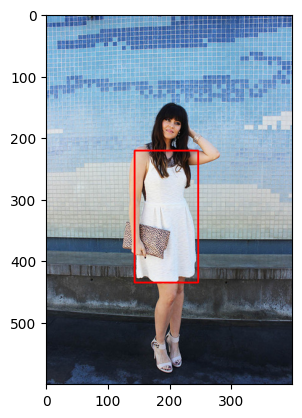

In [5]:
show_image_from_URL(1)

In [6]:
print(f"ALL Categories : {df['category'].unique()}")

ALL Categories : ['ikat' 'plain' 'polka dot' 'geometry' 'floral' 'squares' 'scales'
 'animal' 'OTHER' 'stripes' 'tribal' 'houndstooth' 'cartoon' 'chevron'
 'stars' 'letter_numb' 'skull']


In [7]:
print(f"ALL Categories : \n{df['category'].value_counts()}")

ALL Categories : 
plain          8385
floral         2776
stripes         701
polka dot       651
OTHER           513
tribal          507
squares         439
ikat            355
animal          352
geometry        342
cartoon         261
scales          112
chevron          96
letter_numb      82
houndstooth      66
stars            45
skull            19
Name: category, dtype: int64


<h4>Category : 'Other' will be droping as no specific cretia is given </h4>

In [8]:
df.drop(df[df['category'] == 'OTHER'].index, inplace=True)

# Dropping Category as 'Plain' because of system limitation.
df.drop(df[df['category'] == 'plain'].index, inplace=True)

In [9]:
n_classes = df['category'].nunique()
print('Total number of unique categories:', n_classes)

Total number of unique categories: 15


In [10]:
print(f"ALL Categories :\n{df['category'].value_counts()}")

ALL Categories :
floral         2776
stripes         701
polka dot       651
tribal          507
squares         439
ikat            355
animal          352
geometry        342
cartoon         261
scales          112
chevron          96
letter_numb      82
houndstooth      66
stars            45
skull            19
Name: category, dtype: int64


In [11]:
def extract_feature(img_url):
    try:
        # Download the image from the URL and import it as a numpy array
        response = urllib.request.urlopen(img_url)
        image = np.asarray(bytearray(response.read()), dtype="uint8")
        
        # Read the numpy arrays as color images in OpenCV
        image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
        
        # Convert to grayscale that will be used for training, instead of the color image
        image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
        
        # Create a mask that detects the red rectangular tags present in each image
        mask = cv2.inRange(image_hsv, (0, 255, 255), (0, 255, 255))
        
        # Get the coordinates of the red rectangle in the image, 
        # but take the entire image if the mask fails to detect the red rectangle
        if len(np.where(mask != 0)[0]) != 0:
            y1 = min(np.where(mask != 0)[0])
            y2 = max(np.where(mask != 0)[0])
        else:
            y1 = 0                                     
            y2 = len(mask)

        if len(np.where(mask != 0)[1]) != 0:
            x1 = min(np.where(mask != 0)[1])
            x2 = max(np.where(mask != 0)[1])
        else:
            x1 = 0
            x2 = len(mask[0])

        cropped_img = image_gray[y1:y2, x1:x2]
        image_resize = cv2.resize(cropped_img, (100, 100))
        image_arr = image_resize.flatten()

        return image_arr

    except Exception as e:
        # Handle any exceptions that occur during image processing
        print(f"Error processing image from URL: {img_url}")
        print(e)
        return None  # Return None to indicate that processing failed


In [12]:
# master_arr = []
# for i in df['image_url']:
#     img_arr = extract_feature(i)
#     master_arr.append(img_arr)
# #     


In [13]:
# len(master_arr)

In [14]:

# x = np.array(master_arr)
# x = x/255
# # 
# x.shape
# np_save = np.save('/Users/anujjain/Desktop/Side_Project/Fashion_Project/np_array.npy',x)

In [15]:
master_arr = np.load('/Users/anujjain/Desktop/Side_Project/Fashion_Project/np_array.npy')

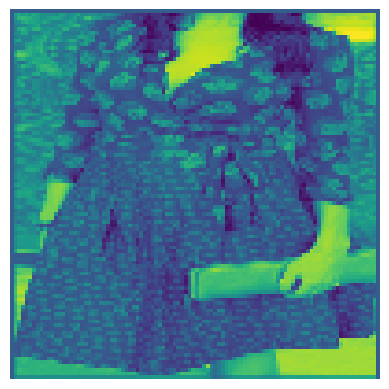

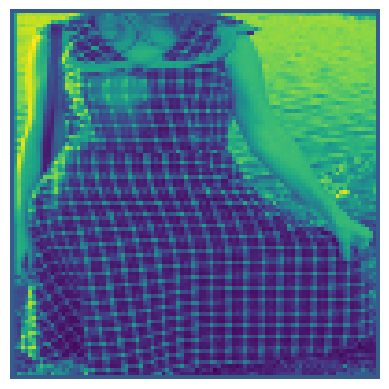

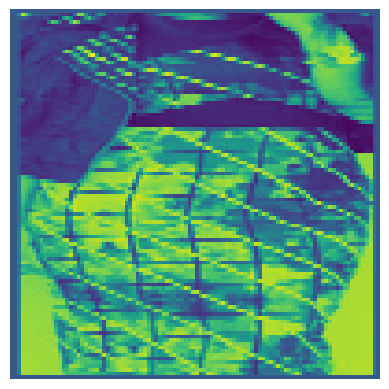

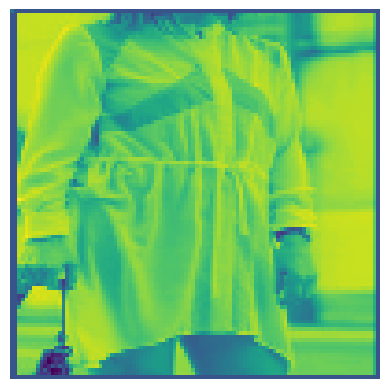

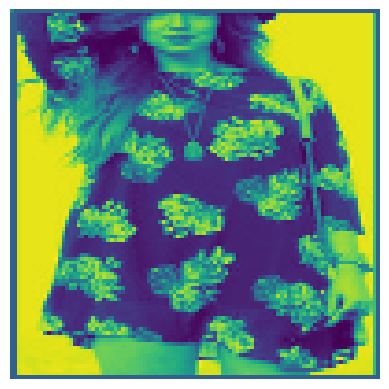

In [16]:
cnt = 0
for i in master_arr:
    plt.figure()
    plt.imshow(i.reshape(100,100))
    plt.axis('off')
    cnt +=1
    if cnt == 5:
        break

<h3>Convert 'Categorial' Field into label Encoder</h3>

In [17]:
Label = LabelEncoder()
Target_label = Label.fit_transform(df['category'])
Target_label.shape

(6804,)

In [18]:
class_labels = list(Label.classes_)

In [19]:
class_labels

['animal',
 'cartoon',
 'chevron',
 'floral',
 'geometry',
 'houndstooth',
 'ikat',
 'letter_numb',
 'polka dot',
 'scales',
 'skull',
 'squares',
 'stars',
 'stripes',
 'tribal']

In [20]:
lst = []
for i in Target_label:
    if i not in lst:
        lst.append(i)


In [21]:
lst

[6, 8, 4, 3, 11, 9, 0, 13, 14, 5, 1, 2, 12, 7, 10]

In [22]:
print(type(n_classes))

<class 'int'>


In [23]:
Y = to_categorical(Target_label, num_classes = n_classes)

Y.shape

(6804, 15)

In [24]:
Y[0:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [25]:
Y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [26]:
Y[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [27]:
#Segregation of a test set for testing on the trained model

X_test = master_arr[6000:,]
Y_test = Y[6000:,]

#Seperation of a validation set from the remaing training set (required for validation while training)

X_train, X_val, Y_train, Y_val = train_test_split(master_arr[:6000,], Y[:6000,], test_size=0.15, random_state=13)

In [28]:
print('X_Train Shape',X_train.shape)
print('Y_Train Shape',Y_train.shape)
print('X_Train Shape',X_val.shape)
print('X_Train Shape',Y_val.shape)


print('X_Test Shape',X_test.shape)
print('Y_Test Shape',Y_test.shape)

X_Train Shape (5100, 10000)
Y_Train Shape (5100, 15)
X_Train Shape (900, 10000)
X_Train Shape (900, 15)
X_Test Shape (804, 10000)
Y_Test Shape (804, 15)


In [29]:
#Reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0],1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0],1, img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0],1,img_rows, img_cols)





In [30]:
print('X_Train Shape',X_train.shape)
print('Y_Train Shape',Y_train.shape)
print('X_Train Shape',X_val.shape)
print('X_Train Shape',Y_val.shape)

X_Train Shape (5100, 1, 100, 100)
Y_Train Shape (5100, 15)
X_Train Shape (900, 1, 100, 100)
X_Train Shape (900, 15)


<h3>Create Model Structure</h3>

In [41]:
# PyTorch libraries and modules
import torch
from torch import nn 
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import GridSearchCV

In [42]:
# Assuming X_Train and Y_Train are your training data and labels as NumPy arrays
# Convert them to PyTorch tensors
X_Train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_Train_tensor = torch.tensor(Y_train, dtype=torch.long)  # Assuming your labels are integers


X_Val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_Val_tensor = torch.tensor(Y_val, dtype=torch.long)  # Assuming your labels are integers


# Create a TensorDataset
train_dataset = TensorDataset(X_Train_tensor, Y_Train_tensor)

val_dataset = TensorDataset(X_Val_tensor, Y_Val_tensor)

# Batch size for training
batch_size = 8

# Create a DataLoader for training data
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

In [43]:
for batch_idx, (data, targets) in enumerate(train_loader):
    if batch_idx == 0:
        first_batch_data = data
        first_batch_targets = targets
        print(first_batch_data.shape)
        print(first_batch_targets.shape)
        break 


torch.Size([8, 1, 100, 100])
torch.Size([8, 15])


In [44]:
class FashionModel(nn.Module):
    def __init__(self, input_channels, output_channels,dropout_prob =0.5):
        super(FashionModel, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization
        self.relu1 = nn.ReLU(inplace=True)  # ReLU Activation
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(32)  # Batch Normalization
        self.relu2 = nn.ReLU(inplace=True)  # ReLU Activation
        
        # MaxPooling Layer
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third Convolutional Layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch Normalization
        self.relu3 = nn.ReLU(inplace=True)  # ReLU Activation
        
        # Fourth Convolutional Layer
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)  # Batch Normalization
        self.relu4 = nn.ReLU(inplace=True)  # ReLU Activation
        
        # Flattening Layer (Preparing for Fully Connected Layers)
        self.num_flat_features = 128 * 13 * 13  # Calculate this based on the output size of conv4
        
        # First Fully Connected Layer
        self.fc1 = nn.Linear(self.num_flat_features, 64)  # 128 is the number of neurons in the hidden layer
        self.relu5 = nn.ReLU(inplace=True)  # ReLU Activation
        
        # Output Layer
        self.fc2 = nn.Linear(64, output_channels)  # Output layer with the specified number of output channels
        
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.dropout3 = nn.Dropout(p=dropout_prob)

    def forward(self, x):

        x = self.conv1(x)  # Convolution operation: input_channels -> 16 output channels, kernel size 3x3, stride 1, padding 2
        x = self.bn1(x)  # Batch Normalization with 16 channels
        x = self.relu1(x)  # ReLU activation
        x = self.maxpool(x)
        
        
        x = self.conv2(x)  # Convolution operation: 16 input channels -> 32 output channels, kernel size 3x3, stride 1, padding 2
        x = self.bn2(x)  # Batch Normalization with 32 channels
        x = self.relu2(x)  # ReLU activation
        x = self.maxpool(x)  # MaxPooling: 2x2 kernel, stride 2

        
        
        x = self.conv3(x)  # Convolution operation: 32 input channels -> 64 output channels, kernel size 3x3, stride 1, padding 1
        x = self.bn3(x)  # Batch Normalization with 64 channels
        x = self.relu3(x)  # ReLU activation

        

        x = self.conv4(x)  # Convolution operation: 64 input channels -> 128 output channels, kernel size 3x3, stride 1, padding 1
        x = self.bn4(x)  # Batch Normalization with 128 channels
        x = self.relu4(x)  # ReLU activation
        x = self.maxpool(x)
   

        x = x.view(-1, self.num_flat_features)  # Flatten the output: 128 * 13 * 13

        x = self.dropout1(x)
        x = self.fc1(x)  # Fully connected layer with 128 neurons
        x = self.relu5(x)  # ReLU activation
        x = self.fc2(x)  # Output layer with specified number of output channels

        return x


In [45]:
# model = FashionModel(input_channels=1, output_channels=15)
# model.load_state_dict(torch.load('/Users/anujjain/Desktop/Side_Project/Fashion_Project/Fashion_model_checkpoint.pth'))
# model.eval()


In [46]:

model = FashionModel(input_channels=1, output_channels=15)  # Assuming num_classes is the number of output classes
criterion = nn.BCEWithLogitsLoss()  # Cross-entropy loss for classification tasks
optimizer = torch.optim.RAdam(model.parameters(), lr=0.0001,  weight_decay=0.001)  # Adam optimizer with learning rate 0.001
scheduler = StepLR(optimizer, step_size=5, gamma=0.7)  # Reduce LR every 5 epochs


In [47]:
num_epochs = 50
loss_values = []
f1_scores = []
for epoch in range(num_epochs):
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        targets = targets.type(torch.FloatTensor)
        # print(outputs.shape)
        # print(targets)

        loss = criterion(outputs, targets)
        # loss_values.append(loss.item())
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss (optional)
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}')
    loss_values.append(loss.item())
    
    # Evaluation on the validation dataset after each epoch
    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for data, targets in val_loader:
            outputs = torch.sigmoid(model(data))
            predictions = torch.round(outputs)  # Round predictions to 0 or 1
            # print(predictions.dtype)
            all_predictions.extend(predictions.cpu().numpy())
            # print('all_predictions : ' + str(all_predictions))
            targets = targets.type(torch.FloatTensor)
            all_targets.extend(targets.cpu().numpy())
            
            
            
        # print(all_predictions)
        # print(all_targets)

    # Calculate F1 score for multilabel classification
    f1 = f1_score(all_targets, all_predictions, average='micro')
    f1_scores.append(f1)
    print(f'Epoch {epoch+1}/{num_epochs}, F1 Score: {f1:.4f}')

    model.train()


Epoch 1/50, Step 1/638, Loss: 0.6903
Epoch 1/50, Step 101/638, Loss: 0.2190
Epoch 1/50, Step 201/638, Loss: 0.2453
Epoch 1/50, Step 301/638, Loss: 0.1938
Epoch 1/50, Step 401/638, Loss: 0.1997
Epoch 1/50, Step 501/638, Loss: 0.2563
Epoch 1/50, Step 601/638, Loss: 0.1677
Epoch 1/50, F1 Score: 0.3758
Epoch 2/50, Step 1/638, Loss: 0.1861
Epoch 2/50, Step 101/638, Loss: 0.1481
Epoch 2/50, Step 201/638, Loss: 0.1970
Epoch 2/50, Step 301/638, Loss: 0.1729
Epoch 2/50, Step 401/638, Loss: 0.2394
Epoch 2/50, Step 501/638, Loss: 0.2439
Epoch 2/50, Step 601/638, Loss: 0.1869
Epoch 2/50, F1 Score: 0.2647
Epoch 3/50, Step 1/638, Loss: 0.1267
Epoch 3/50, Step 101/638, Loss: 0.1174
Epoch 3/50, Step 201/638, Loss: 0.2070
Epoch 3/50, Step 301/638, Loss: 0.1841
Epoch 3/50, Step 401/638, Loss: 0.2338
Epoch 3/50, Step 501/638, Loss: 0.2105
Epoch 3/50, Step 601/638, Loss: 0.2290
Epoch 3/50, F1 Score: 0.4349
Epoch 4/50, Step 1/638, Loss: 0.1933
Epoch 4/50, Step 101/638, Loss: 0.1075
Epoch 4/50, Step 201/638

In [48]:
def plot_loss_F1 (loss_values,f1_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(loss_values, label='Training Loss', color='blue')
    plt.plot(f1_scores, label='F1 Score', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()


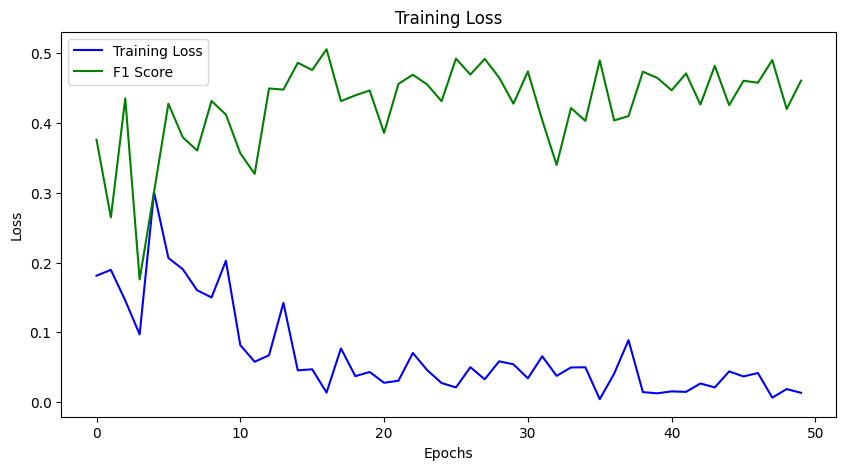

In [49]:
plot_loss_F1(loss_values,f1_scores)

<h3>Test Dataset</h3>

In [50]:
print('X_Train Shape',X_test.shape)
print('Y_Train Shape',Y_test.shape)

X_Train Shape (804, 1, 100, 100)
Y_Train Shape (804, 15)


In [51]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)  # Assuming your labels are integers


# Create a TensorDataset
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [52]:
test_predictions = []  # List to store test predictions
all_targets = []  # List to store true labels

# Iterate over the test data
with torch.no_grad():
    for data, targets in test_loader:
        outputs = torch.sigmoid(model(data))
        predictions = torch.round(outputs)  # Round predictions to 0 or 1
        test_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Convert the list of predictions and targets to NumPy arrays
test_predictions = np.array(test_predictions)
all_targets = np.array(all_targets)

# Calculate F1 score for test data
test_f1 = f1_score(all_targets, test_predictions, average='micro')
print(f'Test F1 Score: {test_f1:.4f}')

print(classification_report(all_targets,test_predictions))




Test F1 Score: 0.4385
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       1.00      0.03      0.07        29
           2       1.00      0.07      0.13        14
           3       0.57      0.62      0.60       305
           4       0.67      0.05      0.09        41
           5       0.00      0.00      0.00         5
           6       0.25      0.05      0.08        40
           7       0.00      0.00      0.00        13
           8       0.62      0.27      0.38        84
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00         1
          11       0.62      0.23      0.33        44
          12       0.00      0.00      0.00         9
          13       0.72      0.57      0.64        88
          14       0.40      0.03      0.06        60

   micro avg       0.59      0.35      0.44       804
   macro avg       0.39      0.13      0.16       804
weig

/Users/anujjain/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anujjain/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


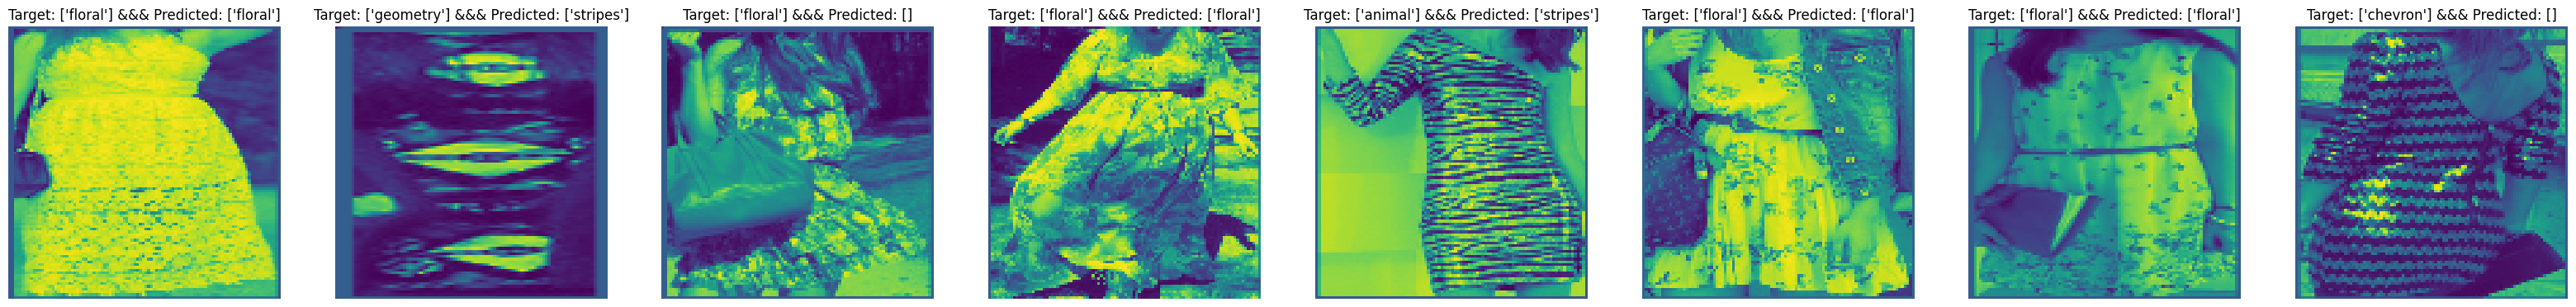

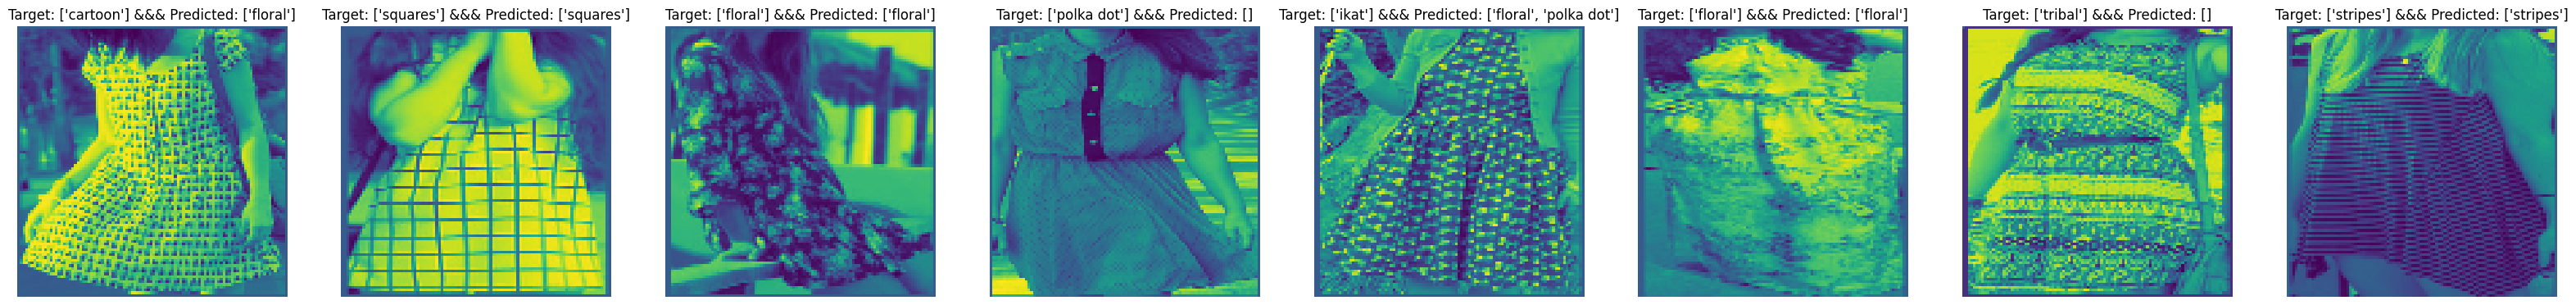

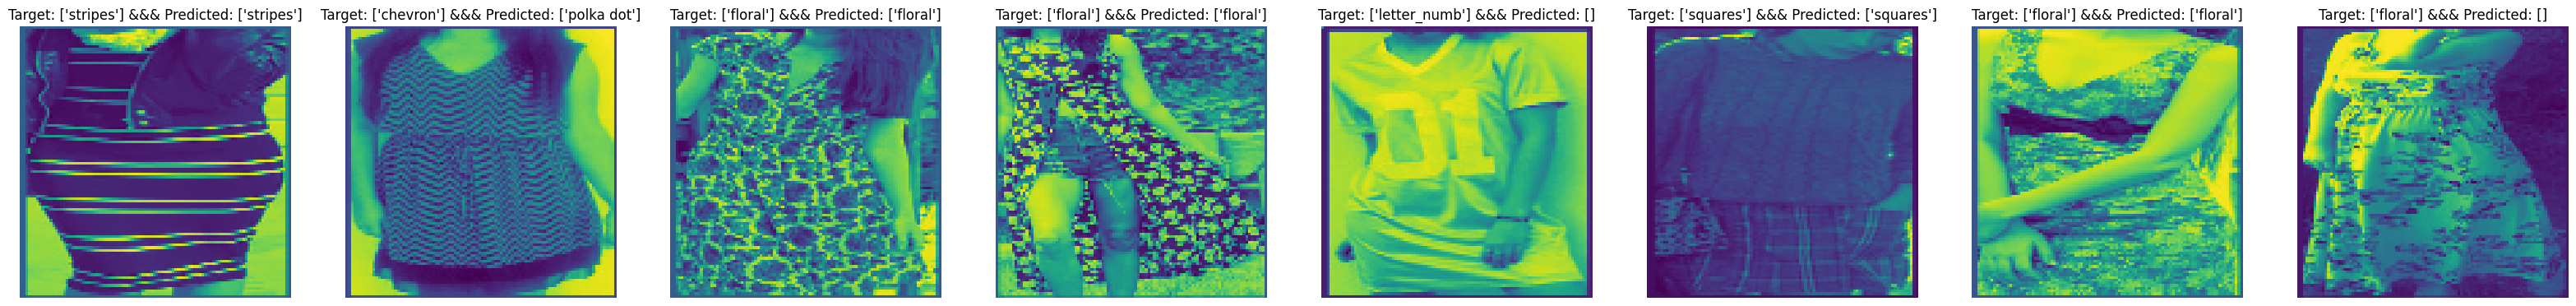

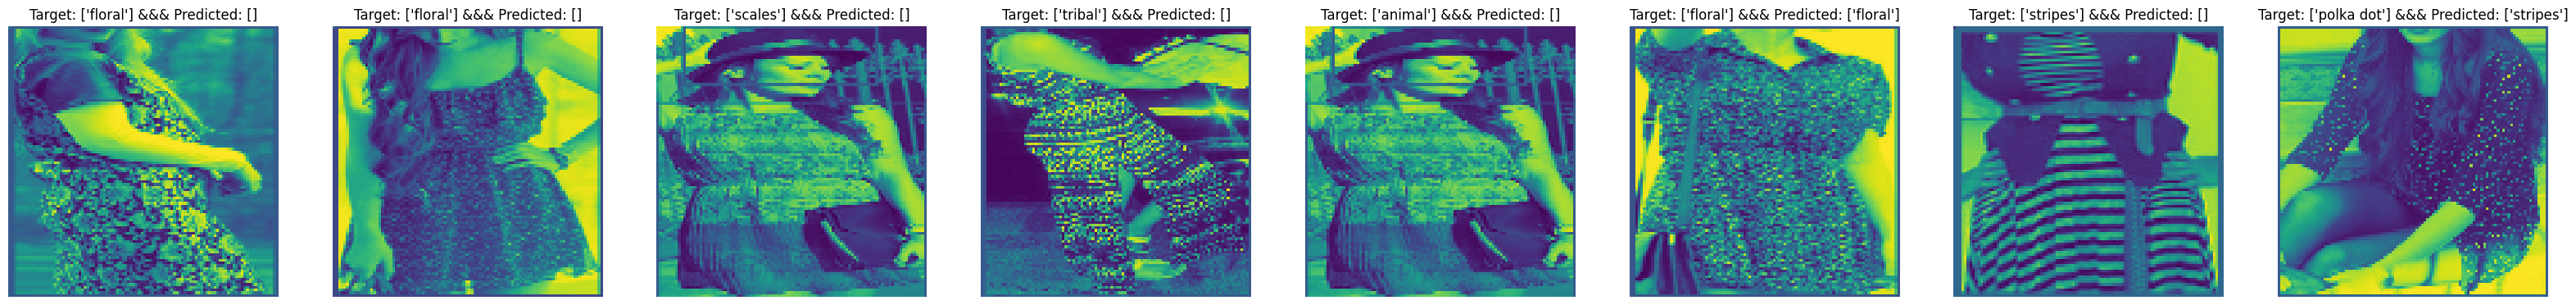

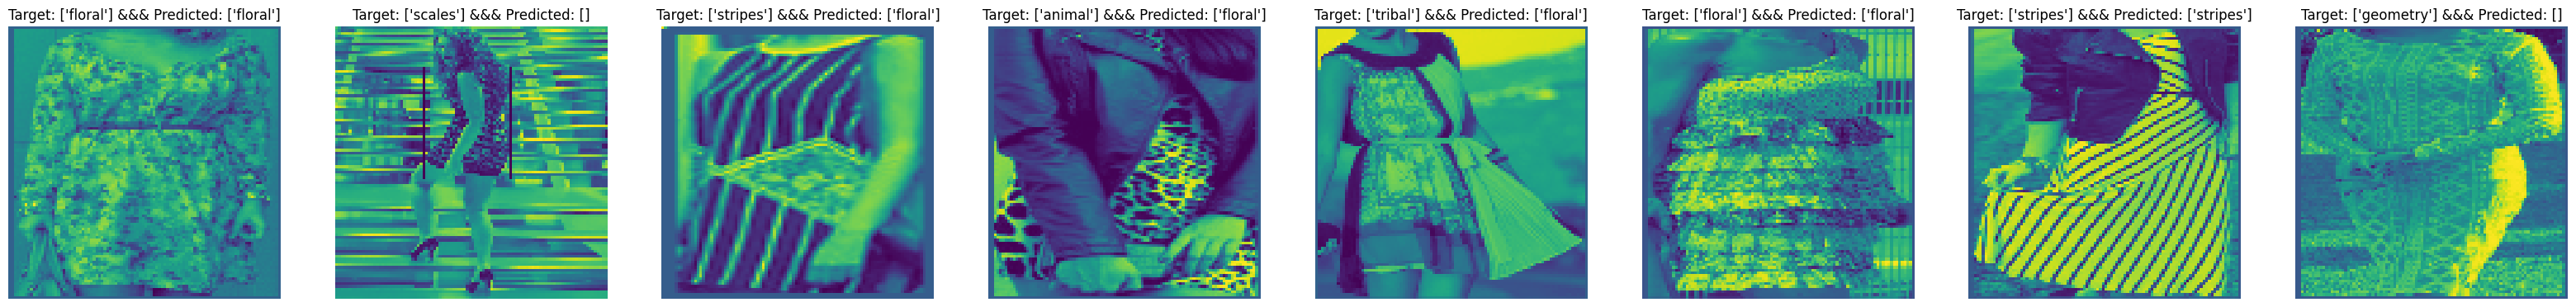

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def show_predictions(images, predictions, targets, class_labels):
    num_images = len(images)
    fig, axs = plt.subplots(1, num_images, figsize=(40, 10))
    
    for i in range(num_images):
        image = images[i].squeeze().cpu().numpy()  # Convert torch tensor to NumPy array
        
        # Extract non-zero indices from predictions and handle 0-dimensional array
        prediction_indices = torch.nonzero(predictions[i]).squeeze().cpu().numpy()
        if prediction_indices.ndim == 0:
            prediction_indices = np.array([prediction_indices.item()])
        
        # print(prediction_indices)
        predicted_classes = [class_labels[idx] for idx in prediction_indices]
        
        
        # targets
        
        targets_indices = torch.nonzero(targets[i]).squeeze().cpu().numpy()
        if targets_indices.ndim == 0:
            targets_indices = np.array([targets_indices.item()])
        
        # print(targets_indices)
        targets_classes = [class_labels[idx] for idx in targets_indices]
        
        axs[i].imshow(image)  # Assuming grayscale images; adjust colormap if using color images
        axs[i].set_title(f'Target: {targets_classes} &&& Predicted: {predicted_classes}')
        axs[i].axis('off')
    
    plt.show()

# Assuming `test_loader` provides batches of test data and `class_labels` is a list of class labels
for batch_idx, (images, targets) in enumerate(test_loader):
    with torch.no_grad():
        outputs = torch.sigmoid(model(images))
        predictions = torch.round(outputs)
    
    show_predictions(images, predictions,targets, class_labels)
    
    # Limit the number of batches to visualize
    if batch_idx >= 4:
        break


In [54]:
torch.save(model.state_dict(), '/Users/anujjain/Desktop/Side_Project/Fashion_Project/Fashion_model_checkpoint.pth')